In [2]:
import pandas as pd
A=pd.read_excel("C:/Users/Pranav Afre/Downloads/PYTHON/AttritioncaseStudy.xlsx")

In [3]:
A.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
A.corr()[["Attrition"]]

,Attrition
Attrition,1.000000
Age,-0.159205
DailyRate,-0.056652
DistanceFromHome,0.077924
Education,-0.031373
EmployeeCount,NaN
EmployeeNumber,-0.010577
EnvironmentSatisfaction,-0.103369
HourlyRate,-0.006846
JobInvolvement,-0.130016


In [5]:
A=A.drop(labels=["EmployeeCount","StandardHours"],axis=1)

In [6]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

C:\Users\Pranav Afre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition', ylabel='count'>

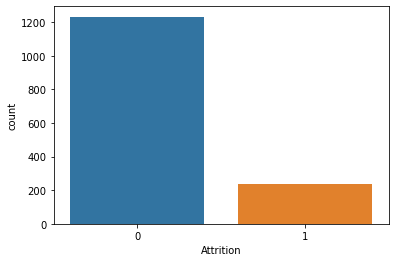

In [7]:
import seaborn as sb
sb.countplot(A.Attrition)

#imbalanced datasets

In [8]:
Z=pd.get_dummies(A[['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']])
    
#treating categorical features

In [9]:
Z.columns

Index(['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Over18_Y', 'OverTime_No', 'OverTime_Yes'],
      dtype='object')

In [10]:
Z=Z.drop(labels=["BusinessTravel_Non-Travel","Department_Human Resources",
                 "EducationField_Human Resources","Gender_Female","JobRole_Human Resources",
                 "MaritalStatus_Divorced","Over18_Y","OverTime_Yes"],axis=1)

#removing extra columns

In [11]:
X=A.drop(labels=['BusinessTravel','Department','EducationField','Gender','JobRole',
                 'MaritalStatus','Over18','OverTime'],axis=1)
X=X.join(Z)
X=X.drop(labels=["Attrition"],axis=1)
y=A[["Attrition"]]

In [12]:
#X=A.drop(labels=["Attrition"],axis=1)
#y=A[["Attrition"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=20)

In [13]:
ytrain.Attrition.value_counts()
#unbalanced dataset

0    990
1    186
Name: Attrition, dtype: int64

In [14]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(random_state=40)
xtrain,ytrain=os.fit_sample(xtrain,ytrain)

#treating skewed dataset

ModuleNotFoundError: No module named 'imblearn'

In [15]:
ytrain.Attrition.value_counts()

0    990
1    186
Name: Attrition, dtype: int64

In [16]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(xtrain,ytrain)
pred=model.predict(xtest)

C:\Users\Pranav Afre\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Pranav Afre\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

print(accuracy_score(ytest,pred))
print(precision_score(ytest,pred))
print(recall_score(ytest,pred))
print(confusion_matrix(ytest,pred))

0.8299319727891157
0.6666666666666666
0.0392156862745098
[[242   1]
 [ 49   2]]


In [18]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       243
           1       0.67      0.04      0.07        51

    accuracy                           0.83       294
   macro avg       0.75      0.52      0.49       294
weighted avg       0.80      0.83      0.76       294

